In [14]:
import numpy as np
import matplotlib.pyplot as plt
from molecule import CaOH, CaH, mu_N, gI
from scipy.constants import h, k
%matplotlib inline

import qls
import utils as ut

# CaOH+

### B = 0: Zero Field

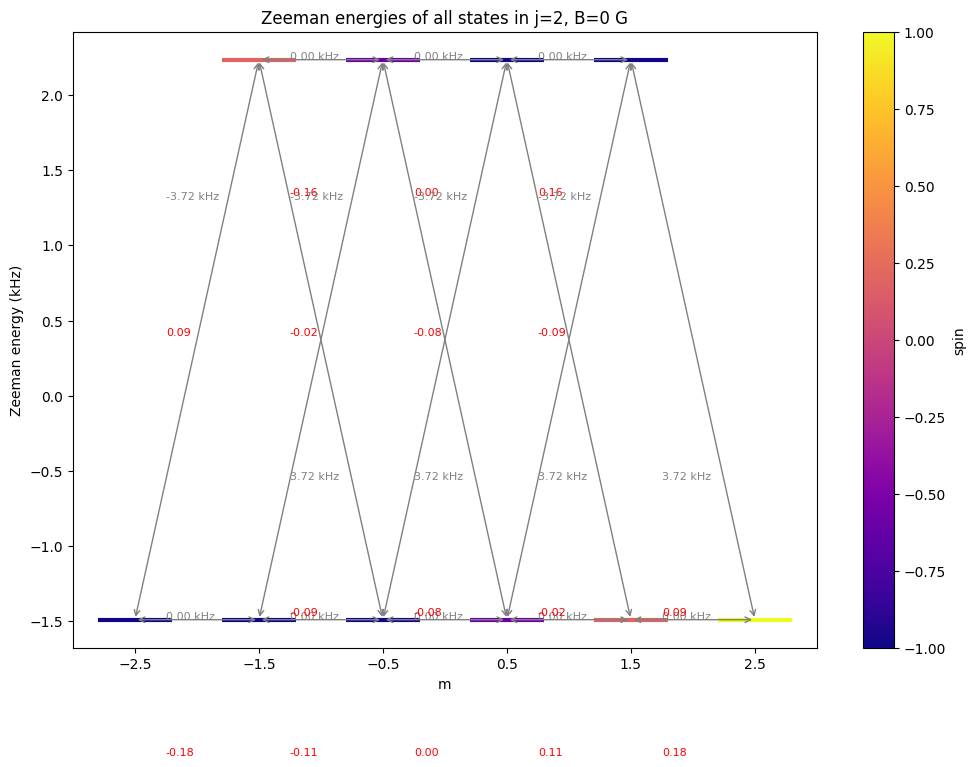

In [ ]:
caoh = CaOH.create_molecule_data(b_field_gauss=0, j_max=14)

# Manifold J=2
caoh.plot_zeeman_levels(2)

### B = 0.09; Zeeman Regime

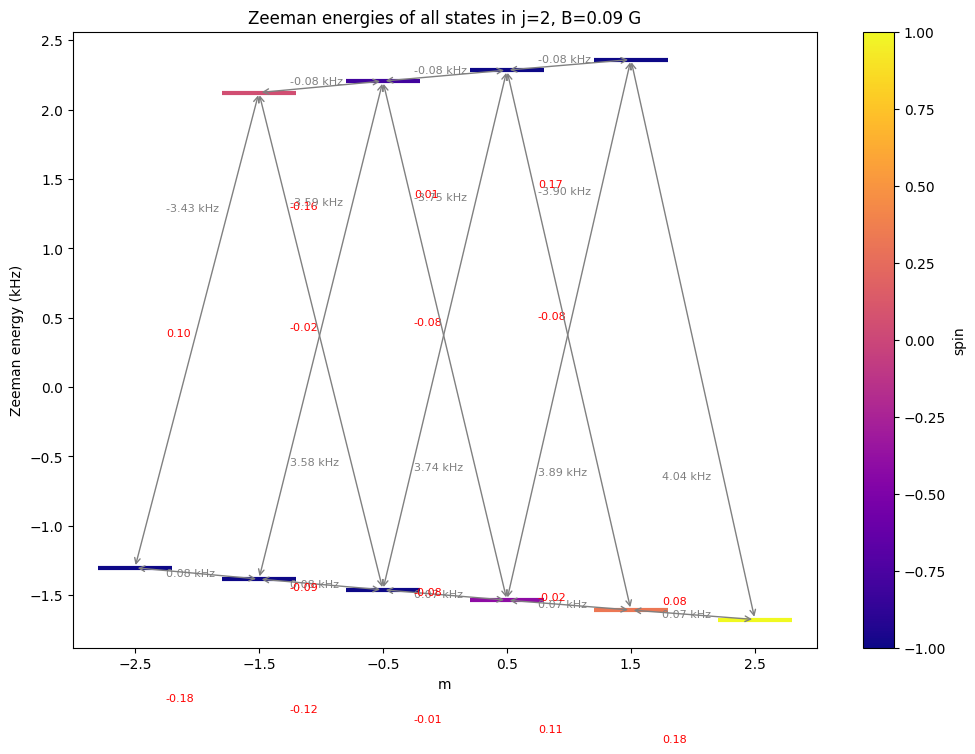

In [ ]:
caoh = CaOH.create_molecule_data(b_field_gauss=0.09, j_max=14)

# Manifold J=2
caoh.plot_zeeman_levels(2)

### B = 0.9; Intermediate Regime

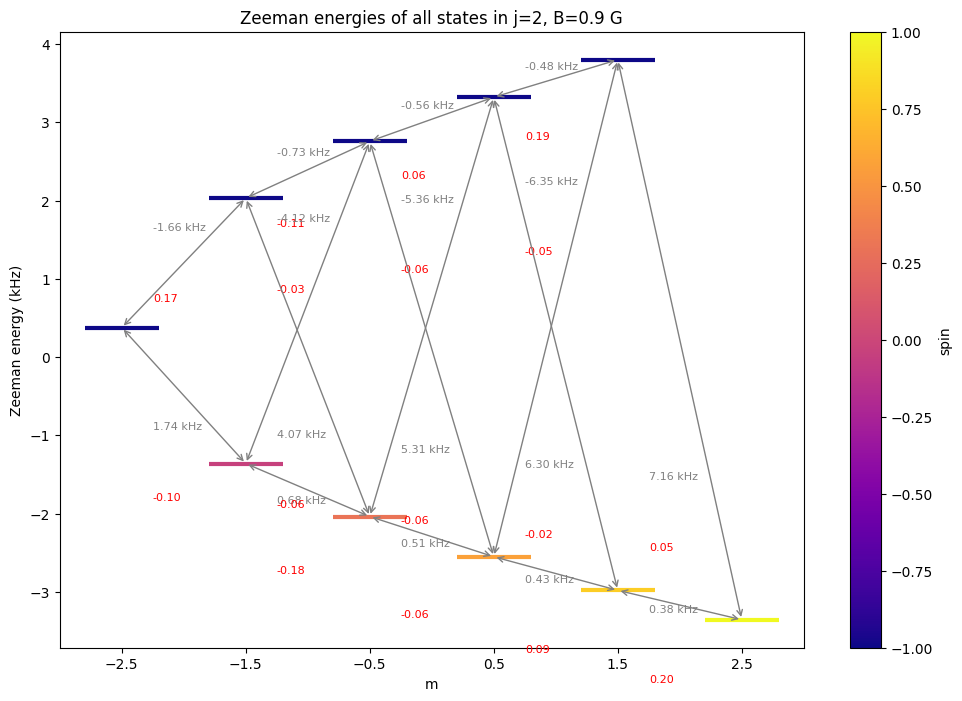

In [ ]:
caoh = CaOH.create_molecule_data(b_field_gauss=0.9, j_max=14)

# Manifold J=2
caoh.plot_zeeman_levels(2)

### B = 9; Paschen-Back Regime

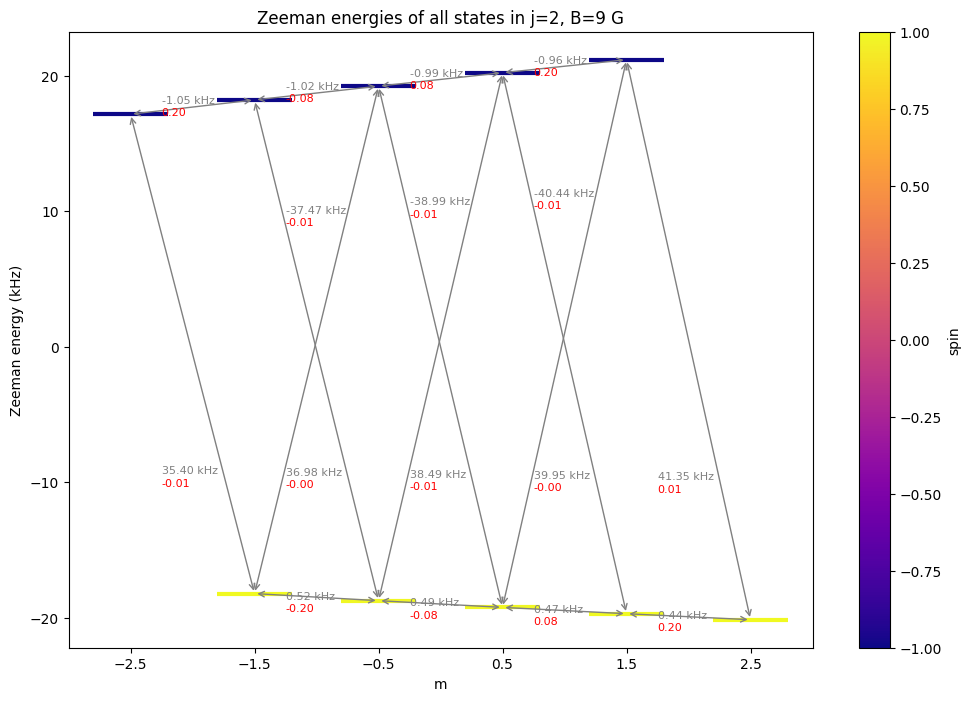

In [ ]:
caoh = CaOH.create_molecule_data(b_field_gauss=9, j_max=14)

# Manifold J=2
caoh.plot_zeeman_levels(2)

### State distribution at fixed T=300K

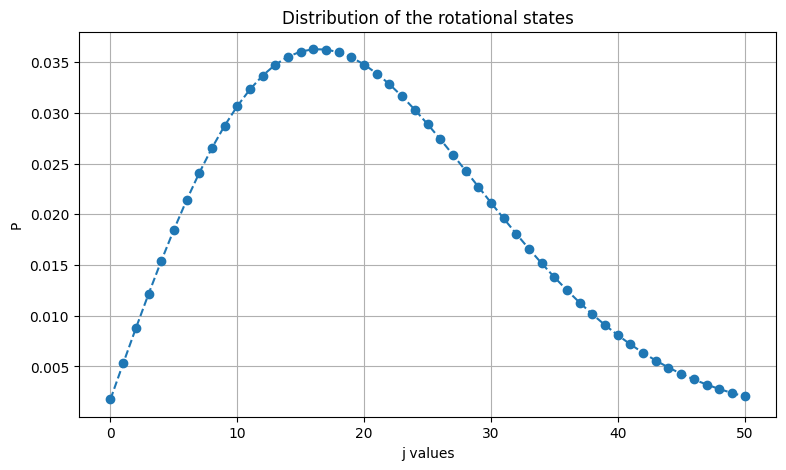

In [ ]:
caoh = CaOH.create_molecule_data(b_field_gauss=0.3, j_max=50)

states = qls.States(caoh, 300)
plt.figure(figsize=(9,5))
plt.plot(np.arange(caoh.j_max+1), states.j_distribution(), linestyle = "--", marker = "o")
plt.xlabel("j values")
plt.ylabel("P")
plt.title("Distribution of the rotational states")
plt.grid()
plt.show()
plt.close()

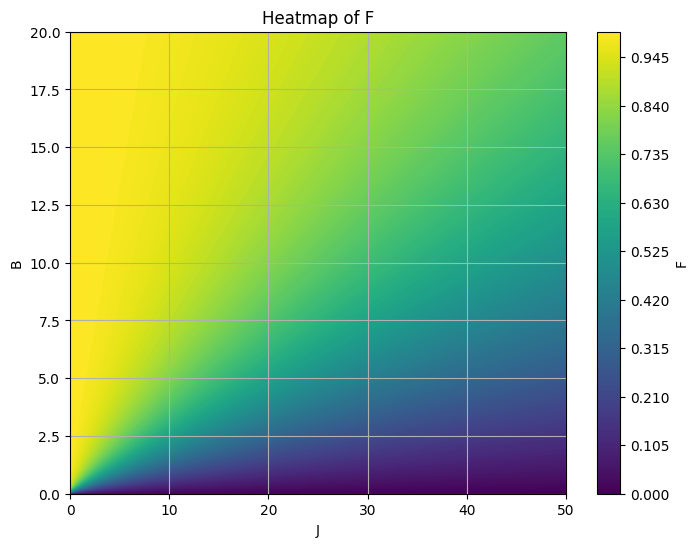

In [7]:
caoh = CaOH.create_molecule_data(b_field_gauss=10, j_max=50)
caoh.fom(b_start=0,b_stop=20,j_start=0,j_stop=50)

### Transitions

I analyze the following transitions at different Js, and in different regimes of B:
- Signature transition: it's the target transition in the molecule
- Penultimate transition: it's the transition at m+1 to the right of the signature transition
- Sub-manifold splitting: it's the splitting of the manifold between the states at $\xi = -$ and $\xi = +$ 

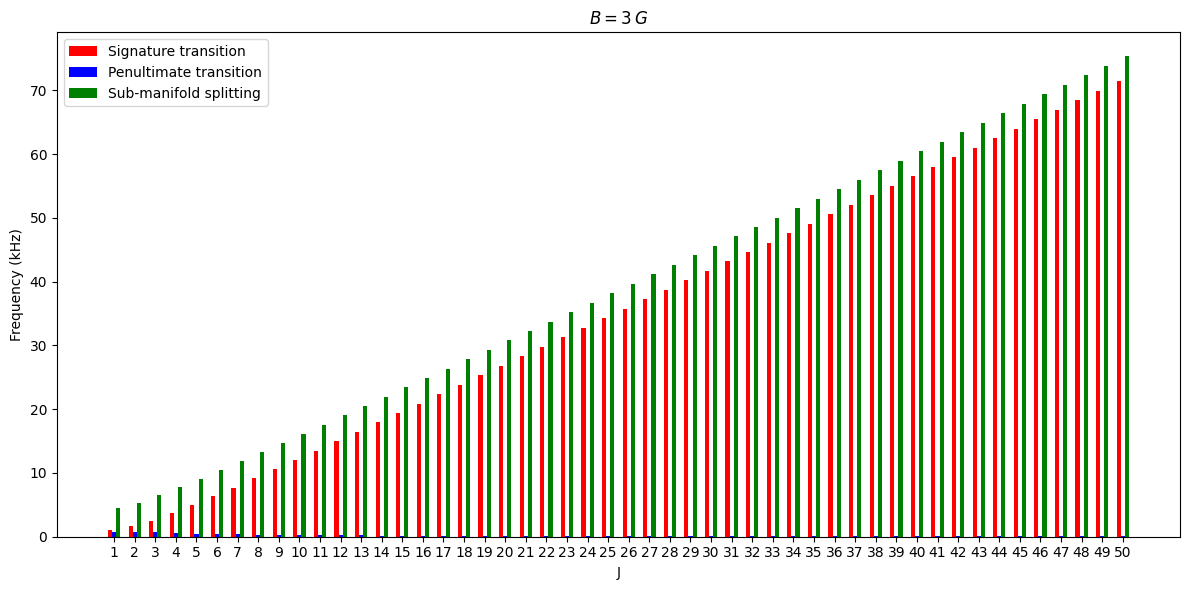

In [ ]:
# Intermediate regime

caoh = CaOH.create_molecule_data(b_field_gauss=0.9, j_max=50)
ut.plot_transitions(caoh, text = False)

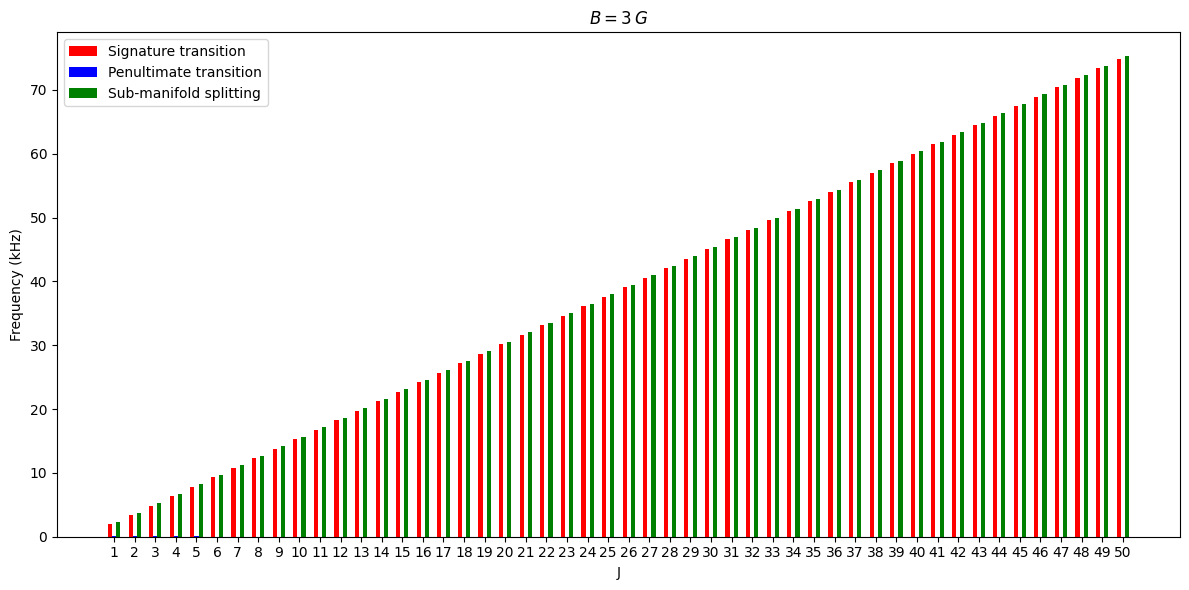

In [ ]:
# Zeeman Regime

caoh = CaOH.create_molecule_data(b_field_gauss=0.09, j_max=50)
ut.plot_transitions(caoh, text = False)

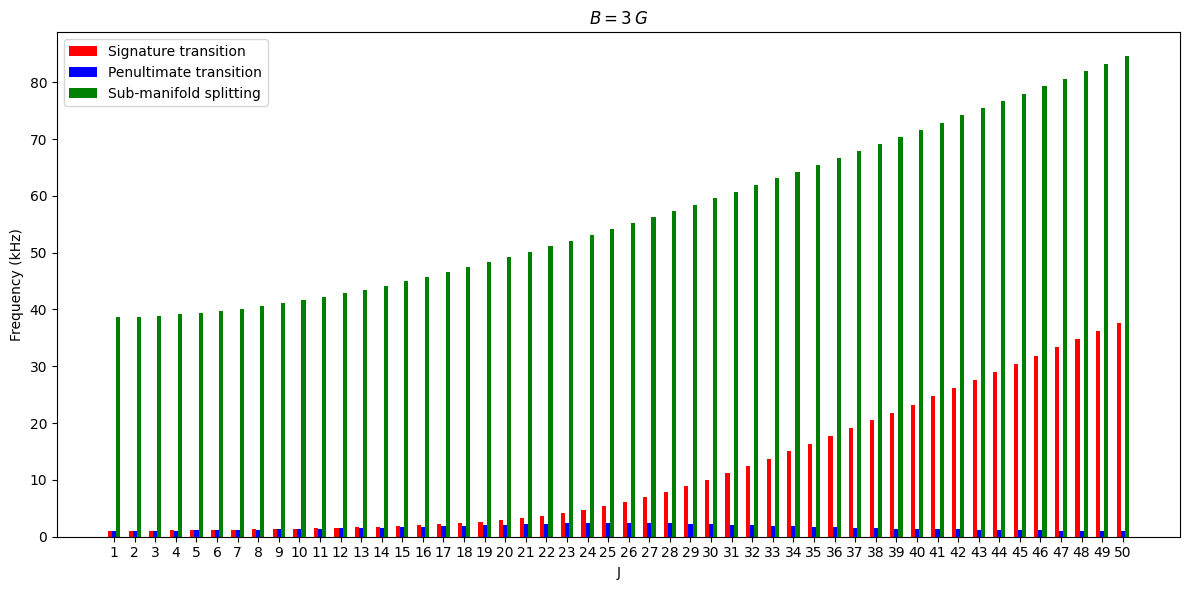

In [ ]:
# Pachen-Back regime

caoh = CaOH.create_molecule_data(b_field_gauss= 9, j_max=50)
ut.plot_transitions(caoh, text = False) 

## Quantum Logic Spectroscopy

The data for the simulation are listed in the cell below. <br> 
Here, we perform two pumping procedures at frequency 0 kHz and -0.350 kHz

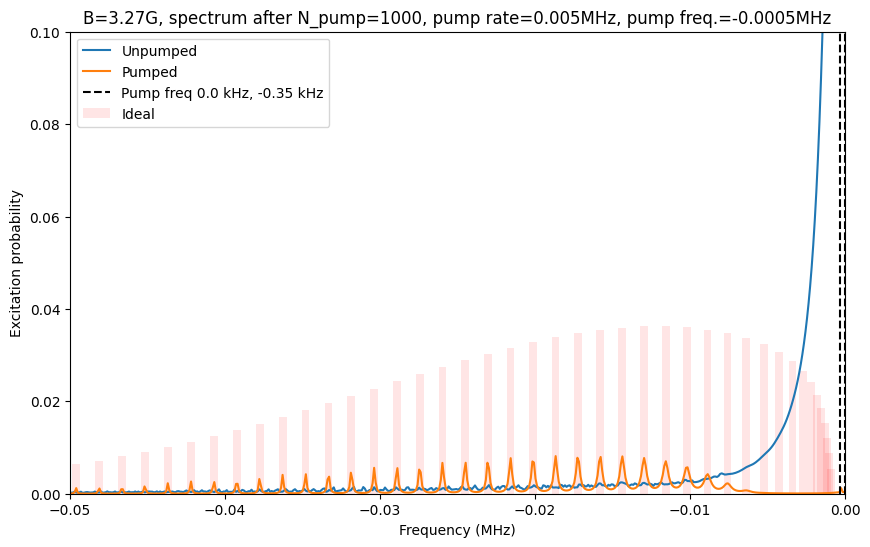

In [ ]:
b_field_gauss = 3.27
j_max = 50

mo1 = CaOH.create_molecule_data(b_field_gauss=b_field_gauss, j_max=j_max)

temperature = 300
states1 = qls.States(mo1, temperature)


signature_transitions = np.array([mo1.transition_df.loc[mo1.transition_df["j"]==j].iloc[0]["energy_diff"] * 1e-3 for j in range(1, mo1.j_max+1)])

duration_us = 5000.0
rabi_rate_mhz = 2*np.pi*0.005
max_frequency_mhz = 0.05
scan_points = 1000
dephased = True
coherence_time_us = 100


fig, ax = plt.subplots(figsize=(10, 6))

# Before
frequencies, exc_probs1_before = qls.get_spectrum(mo1, states1.dist, duration_us, rabi_rate_mhz, max_frequency_mhz, scan_points, dephased, is_minus)
plt.plot(frequencies, exc_probs1_before, label = "Unpumped")


# After

pump_frequency_mhz_1 = 0.000
num_pumps = 1000
pump_rabi_rate_mhz = 2*np.pi*0.005
pump_duration_us = 1000.0


for _ in range(num_pumps):
    states1.dist += qls.excitation_matrix(mo1, pump_frequency_mhz_1, pump_duration_us, pump_rabi_rate_mhz, dephased, is_minus).dot(states1.dist)

pump_frequency_mhz_2 = -0.00035

for _ in range(num_pumps):
    states1.dist += qls.excitation_matrix(mo1, pump_frequency_mhz_2, pump_duration_us, pump_rabi_rate_mhz, dephased, is_minus).dot(states1.dist)



frequencies, exc_probs1_after = qls.get_spectrum(mo1, states1.dist, duration_us, rabi_rate_mhz, max_frequency_mhz, scan_points, dephased, is_minus)
plt.plot(frequencies, exc_probs1_after, label = f"Pumped")

ax.bar(signature_transitions, states1.j_distribution()[1:], color="red", width=0.0005, alpha=0.1, label = "Ideal")
ax.axvline(x=pump_frequency_mhz_2, color='black', linestyle='--')
ax.axvline(x=pump_frequency_mhz_1, color='black', linestyle='--', label=f'Pump freq {pump_frequency_mhz_1*(1e3)} kHz, {pump_frequency_mhz_2*(1e3)} kHz')
ax.set_xlabel("Frequency (MHz)")
ax.set_ylabel("Excitation probability")
ax.set_title(f"B={b_field_gauss}G, spectrum after N_pump={num_pumps}, pump rate={pump_rabi_rate_mhz/(2*np.pi):.3f}MHz, pump freq.={pump_frequency_mhz}MHz")

a_lim = -max_frequency_mhz
b_lim = 0

ax.set_xlim([a_lim, b_lim])
ax.set_ylim([0, 0.2])
ax.set_ylim(0,0.1)
ax.legend()
plt.show()

Zoom in the are near the origin

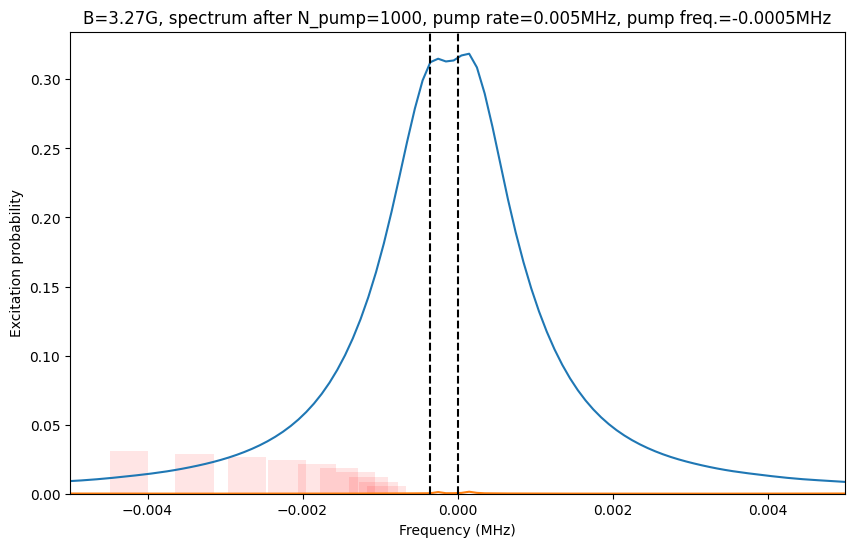

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

# Before
plt.plot(frequencies, exc_probs1_before, label = "Unpumped")
plt.plot(frequencies, exc_probs1_after, label = f"Pumped")

ax.bar(signature_transitions, states1.j_distribution()[1:], color="red", width=0.0005, alpha=0.1, label = "Ideal")
ax.axvline(x=pump_frequency_mhz_2, color='black', linestyle='--')
ax.axvline(x=pump_frequency_mhz_1, color='black', linestyle='--', label=f'Pump freq {pump_frequency_mhz_1*(1e3)} kHz, {pump_frequency_mhz_2*(1e3)} kHz')


ax.set_xlabel("Frequency (MHz)")
ax.set_ylabel("Excitation probability")
ax.set_title(f"B={b_field_gauss}G, spectrum after N_pump={num_pumps}, pump rate={pump_rabi_rate_mhz/(2*np.pi):.3f}MHz, pump freq.={pump_frequency_mhz}MHz")

max_frequency_mhz = 0.005

a_lim = -max_frequency_mhz
b_lim = max_frequency_mhz

ax.set_xlim([a_lim, b_lim])
plt.show()

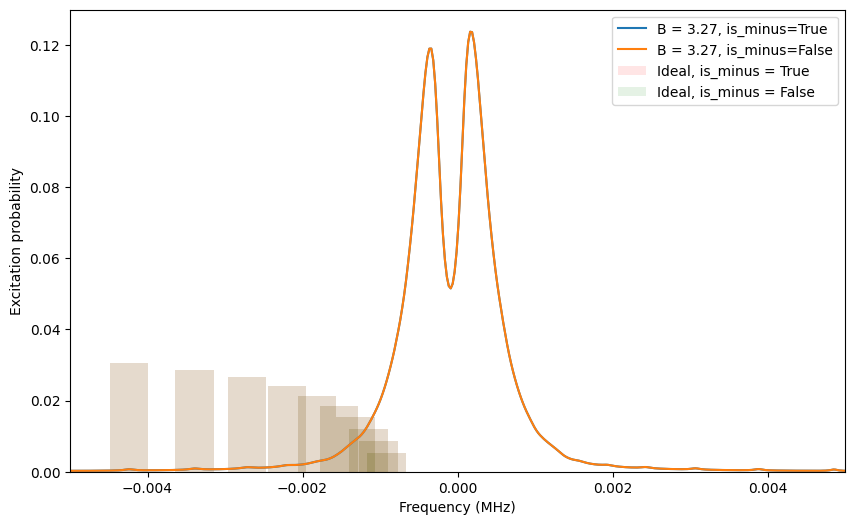

In [ ]:
b_field_gauss = 3.27
j_max = 50


duration_us = 5000.0
rabi_rate_mhz = 0.005
max_frequency_mhz = 0.005
scan_points = 400
dephased = True
coherence_time_us = 100

temperature = 300

# is_minus = True
is_minus = True

caoh = CaOH.create_molecule_data(b_field_gauss=b_field_gauss, j_max=j_max)
states = qls.States(caoh, temperature)


signature_transitions = np.array([caoh.transition_df.loc[caoh.transition_df["j"]==j].iloc[0]["energy_diff"] * 1e-3 for j in range(caoh.j_max+1)])
frequencies, exc_probs = qls.get_spectrum(caoh, states.dist, duration_us, rabi_rate_mhz, max_frequency_mhz, scan_points, dephased, coherence_time_us, is_minus)



# is_minus = False
is_minus = False

caoh_false = CaOH.create_molecule_data(b_field_gauss=b_field_gauss, j_max=j_max)
states_false = qls.States(caoh_false, temperature)

signature_transitions_false = np.array([caoh_false.transition_df.loc[caoh_false.transition_df["j"]==j].iloc[0]["energy_diff"] * 1e-3 for j in range(caoh_false.j_max+1)])
frequencies_false, exc_probs_false = qls.get_spectrum(caoh_false, states_false.dist, duration_us, rabi_rate_mhz, max_frequency_mhz, scan_points, dephased, coherence_time_us, is_minus)



fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(frequencies, exc_probs, label = f"B = {b_field_gauss}, is_minus=True")
ax.plot(frequencies, exc_probs_false, label = f"B = {b_field_gauss}, is_minus=False")  

ax.bar(signature_transitions, states.j_distribution(), color="red", width=0.0005, alpha=0.1, label = "Ideal, is_minus = True")
ax.bar(signature_transitions_false, states_false.j_distribution(), color="green", width=0.0005, alpha=0.1, label = "Ideal, is_minus = False")


plt.legend()
plt.xlabel("Frequency (MHz)")
plt.ylabel("Excitation probability")
plt.xlim([-max_frequency_mhz, max_frequency_mhz])
# plt.yscale("log")
plt.show()